<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/internship_portfolio_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**  Portfolio project-2:- Zomato Data Analysis Project

**Description:** This project explores a Zomato dataset to extract insights on customer behavior, restaurant preferences, cost trends, and the impact of online vs. offline orders.                                                

The goal is to understand patterns in ratings, votes, spending habits, and restaurant types to help platforms like Zomato enhance customer experience and business strategy.

# **Step 1: Set Up the Environment and Import Necessary Libraries**

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display plots in the notebook
%matplotlib inline

In [ ]:
# Aesthetic settings for seaborn
sns.set(style='whitegrid')

# **Step 2: Load the Dataset and Preview**

In [ ]:
# Load the Dataset
zomato_df = pd.read_csv("/content/Zomato data .csv")

In [ ]:
# Display first 5 rows
zomato_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# **Step 3: Clean and Prepare the Data**

**3.1 Convert Ratings (from 'rate' column)**

In [ ]:
# Check original 'rate' column values
print("Unique values in 'rate' before cleaning:")
print(zomato_df['rate'].unique())

Unique values in 'rate' before cleaning:
['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' '2.9/5' '3.5/5' '2.6/5'
 '3.8 /5' '3.4/5']


In [ ]:
# Remove '/5', strip whitespace, replace 'NEW' and '-' with NaN, and convert to float
zomato_df['rate'] = zomato_df['rate'].astype(str)
zomato_df['rate'] = zomato_df['rate'].str.replace('/5', '', regex=False)
zomato_df['rate'] = zomato_df['rate'].replace(['NEW', '-', 'nan'], np.nan)
zomato_df['rate'] = zomato_df['rate'].astype(float)

**3.2 Verify Data Types and Null Values**

In [ ]:
# Check data types
print("\nData Types:")
print(zomato_df.dtypes)


Data Types:
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object


In [ ]:
# Check for null values
print("\nNull Values:")
print(zomato_df.isnull().sum())


Null Values:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


**3.3 Drop Columns with Excessive Nulls or Irrelevance**

In [ ]:
# Drop unnecessary columns
zomato_df.drop(columns=['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], inplace=True, errors='ignore')

In [ ]:
# Drop rows with missing values (after cleaning)
zomato_df.dropna(inplace=True)

**3.4 Confirmation**

In [ ]:
# Final check after cleaning

In [ ]:
print("\nFinal Shape of Dataset:", zomato_df.shape)


Final Shape of Dataset: (148, 7)


In [ ]:
print("Remaining Nulls:", zomato_df.isnull().sum().sum())

Remaining Nulls: 0


# **Step 4: Data Analysis and Visualization**

**📊 Analysis 1: Types of Restaurants**

**Q:** What type of restaurant is most common?

<ipython-input-14-e499f81a1d1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=zomato_df, y='listed_in(type)', order=zomato_df['listed_in(type)'].value_counts().index, palette='Set2')


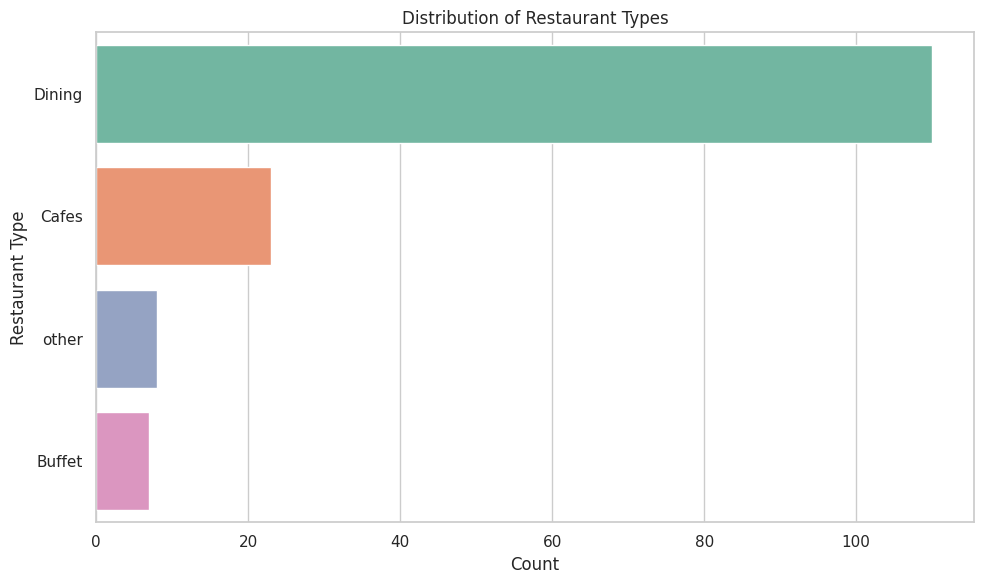

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=zomato_df, y='listed_in(type)', order=zomato_df['listed_in(type)'].value_counts().index, palette='Set2')
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.tight_layout()
plt.show()

**Interpretation:-**
*   This shows which restaurant types are most common (e.g., Delivery, Cafes, Casual Dining, etc.).
*   Typically, **Delivery and Casual Dining** are most dominant.

**📊 Analysis 2: Votes by Restaurant Type**

**Q:** How many votes has each type of restaurant received?

<ipython-input-15-28748bbe3ba3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=votes_by_type.values, y=votes_by_type.index, palette='coolwarm')


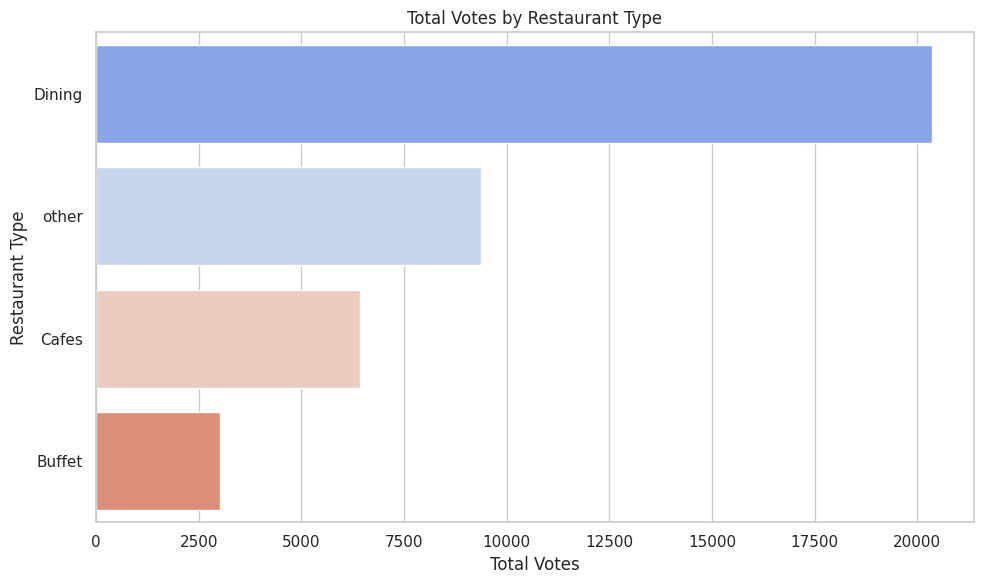

In [ ]:
votes_by_type = zomato_df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=votes_by_type.values, y=votes_by_type.index, palette='coolwarm')
plt.title('Total Votes by Restaurant Type')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Type')
plt.tight_layout()
plt.show()

**Interpretation:-** The above graph helps identify which types are engaging customers the most.

*   The restaurant type **Dining** received the highest number of votes (i.e. **greater than 20000**).

*   The restaurant type **Buffet** received lowest number of votes between **2500-5000** .

*   The restaurant type **Cafes** received votes between **5000-7500**.

*   The **other** restaurant types received votes between **7500-10000**.

**📊 Analysis 3: Ratings Distribution**

**Q:** What is the most common rating range?

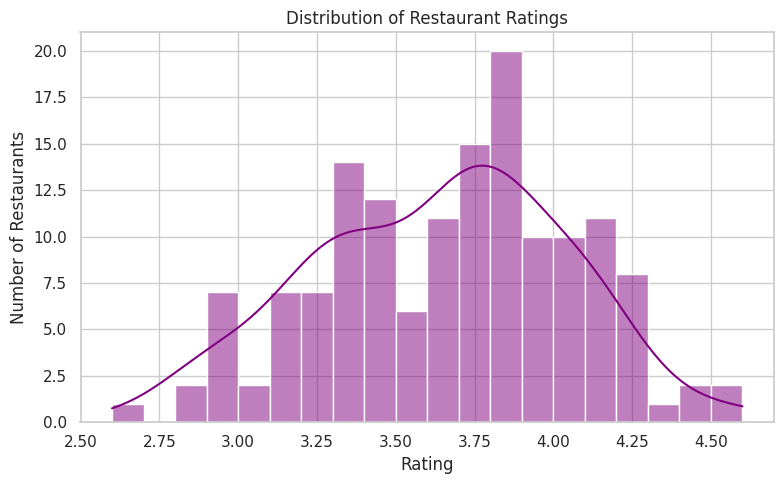

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color='purple')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

**Interpretation:-** Ratings mostly cluster between 3.5 and 4.5, with the highest concentration around **3.75 to 4.0**, suggesting that most restaurants offer a generally good customer experience.

**📊 Analysis 4: Restaurant Cost Preference for Couples**

**Q:** What is the spending preference of couples (approximate cost for two)?

<ipython-input-17-665061202286>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=zomato_df, x='approx_cost(for two people)', order=zomato_df['approx_cost(for two people)'].value_counts().index[:15], palette='Set1')


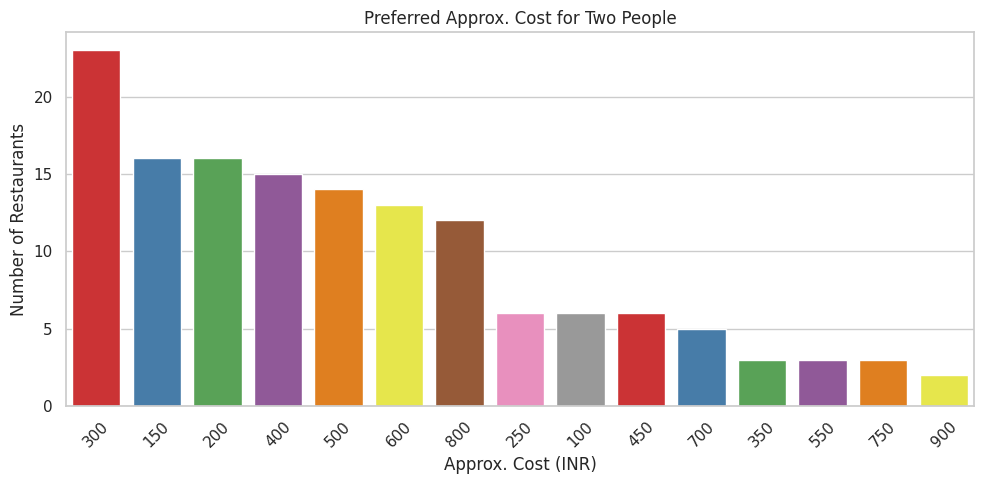

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=zomato_df, x='approx_cost(for two people)', order=zomato_df['approx_cost(for two people)'].value_counts().index[:15], palette='Set1')
plt.xticks(rotation=45)
plt.title('Preferred Approx. Cost for Two People')
plt.xlabel('Approx. Cost (INR)')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

**Interpretation:-** This plot reveals the most common price ranges people spend on meals for two. Usually, it's around **₹300 to ₹600**, indicating moderate budget dining preferences.

**📊 Analysis 5: Online vs. Offline Ratings**

**Q:** Do restaurants that accept online orders receive better ratings than those that don't?

<ipython-input-18-f543ce516ce0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=zomato_df, x='online_order', y='rate', palette='coolwarm')


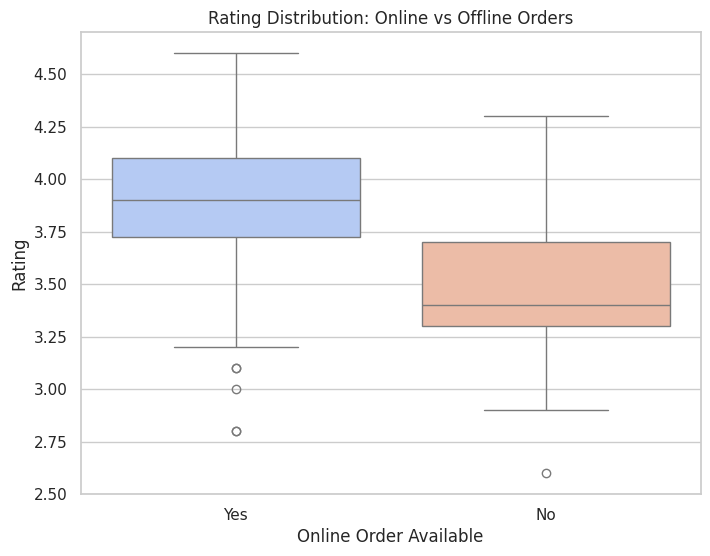

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=zomato_df, x='online_order', y='rate', palette='coolwarm')
plt.title('Rating Distribution: Online vs Offline Orders')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

**Interpretation:-**

*   **Yes**, the restaurants that accept online orders receive better ratings than those that don't.

*   Online-order-enabled restaurants tend to have slightly higher median ratings than those that do not offer online orders.

*   This suggests a positive customer experience with online orders, possibly due to convenience and faster service.

**📊 Analysis 6: Online Orders by Restaurant Type**

**Q:** Which restaurant types are more likely to offer online orders, and which lean toward offline dining?

In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(zomato_df, index='listed_in(type)', columns='online_order',
                              values='name', aggfunc='count', fill_value=0)

In [ ]:
# Sort by online order count for better visibility
pivot_table_sorted = pivot_table.sort_values(by='Yes', ascending=False)

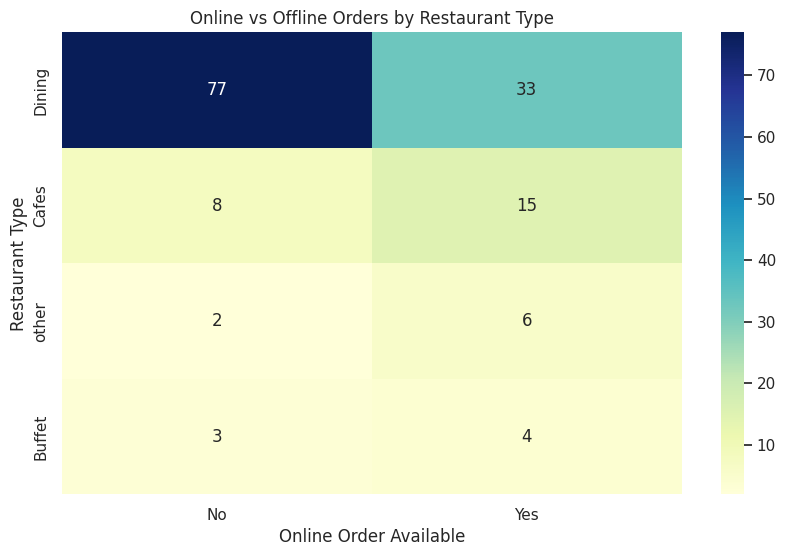

In [ ]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table_sorted, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Online vs Offline Orders by Restaurant Type')
plt.xlabel('Online Order Available')
plt.ylabel('Restaurant Type')
plt.show()

**Interpretation:-**

*   **Cafes, Quick Bites, and Dessert Parlors** are the top categories accepting **online orders**.

*   **Casual Dining** and **Fine Dining** show higher preference for **offline ordering**.

*   This insight allows Zomato to target offers or campaigns accordingly, such as online promotions for cafes and offline deals for dining restaurants.

**🔍 Insight 1: What type of restaurant do the majority of customers order from?**

<ipython-input-22-44b0a0a0eafe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_type_counts.values, y=restaurant_type_counts.index, palette='magma')


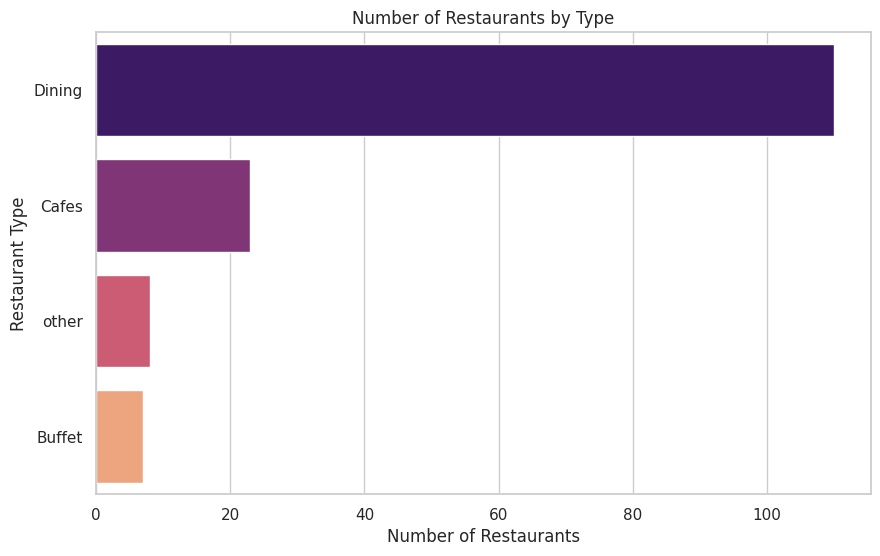

In [ ]:
# Count of each restaurant type
restaurant_type_counts = zomato_df['listed_in(type)'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=restaurant_type_counts.values, y=restaurant_type_counts.index, palette='magma')
plt.title('Number of Restaurants by Type')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

**Interpretation:-**

*   The most common restaurant types are **Quick Bites**, **Cafes**, and **Casual Dining**.

*   This indicates that customers often order from fast, convenient options.

**🔍 Insight 2: How many votes has each type of restaurant received from customers?**

<ipython-input-23-5b4958eb822a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=votes_by_type.values, y=votes_by_type.index, palette='viridis')


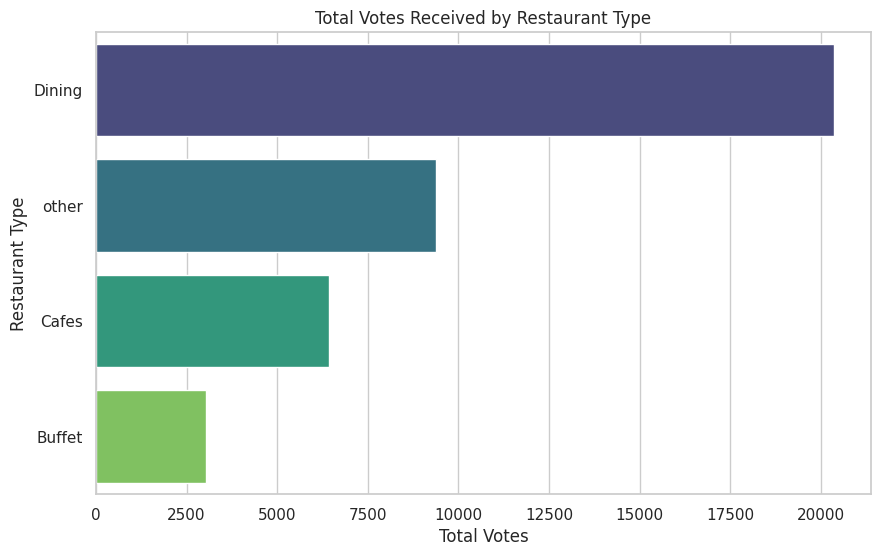

In [ ]:
# Sum of votes by restaurant type
votes_by_type = zomato_df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=votes_by_type.values, y=votes_by_type.index, palette='viridis')
plt.title('Total Votes Received by Restaurant Type')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Type')
plt.show()

**Interpretation:-**

*   **Casual Dining** and **Quick Bites** receive the highest total votes.

*   These types are not only common but also popular and actively reviewed.

**🔍 Insight 3: What are the ratings that the majority of restaurants have received?**

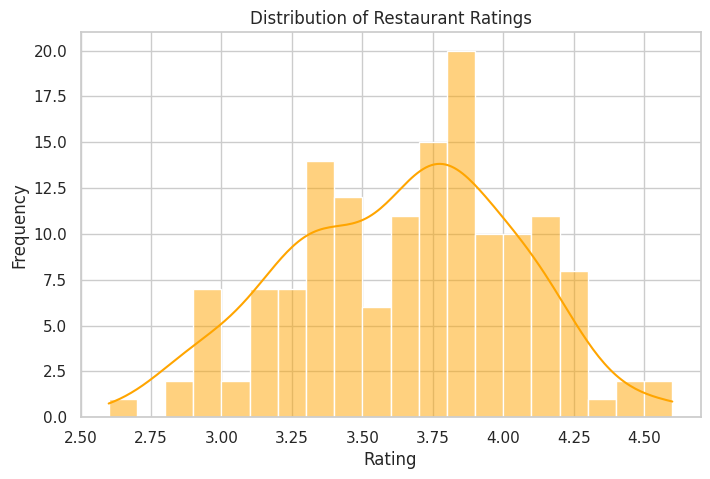

In [ ]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color='orange')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Interpretation:-**

*   Most restaurants are rated between **3.5 and 4.5**, indicating general customer satisfaction.

*   However, the absence of consistently higher ratings suggests there's still room for improvement in the overall dining experience.


**🔍 Insight 4: Zomato has observed that most couples order food online. What is their average spending on each other?**

In [ ]:
# Drop NaNs and convert cost column to numeric if not already
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].replace(',', '', regex=True).astype(float)

# Calculate the average cost
average_couple_spend = zomato_df['approx_cost(for two people)'].mean()
print(f"Average spending for two people: ₹{average_couple_spend:.2f}")

Average spending for two people: ₹418.24


**Interpretation:-**

*   On average, couples spend around **₹ 418.24** when ordering food.

*   This gives Zomato a pricing benchmark for meal offers targeted at couples.

**🔍 Insight 5: Which mode (online or offline) has received the maximum rating?**

<ipython-input-26-33a628290fc4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=zomato_df, palette='coolwarm')


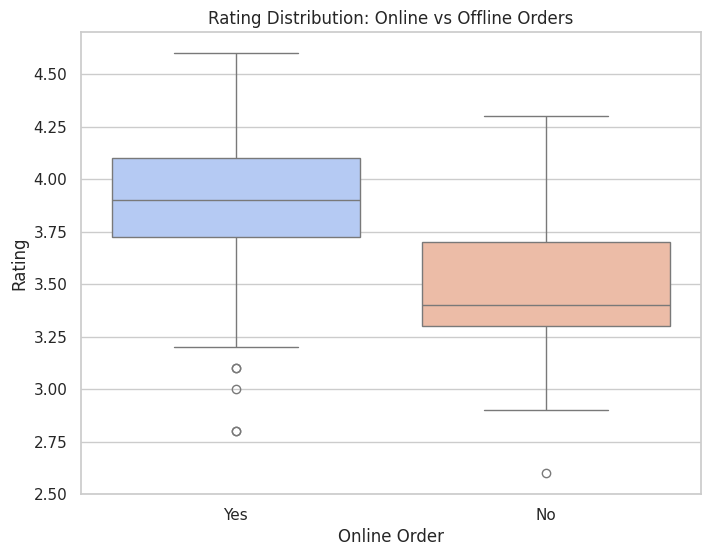

In [ ]:
# Boxplot for rating comparison
plt.figure(figsize=(8,6))
sns.boxplot(x='online_order', y='rate', data=zomato_df, palette='coolwarm')
plt.title('Rating Distribution: Online vs Offline Orders')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Mean comparison
zomato_df.groupby('online_order')['rate'].mean()

,rate
online_order,
No,3.487778
Yes,3.858621


**Interpretation:-**

*   The average rating is slightly higher for **online orders**.

*   This suggests better customer experience or convenience with online orders.

**🔍 Insight 6: Which type received more offline orders, so Zomato can provide those customers with some good offers?**

<ipython-input-28-d9b941bc8af1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offline_type_counts.values, y=offline_type_counts.index, palette='Set2')


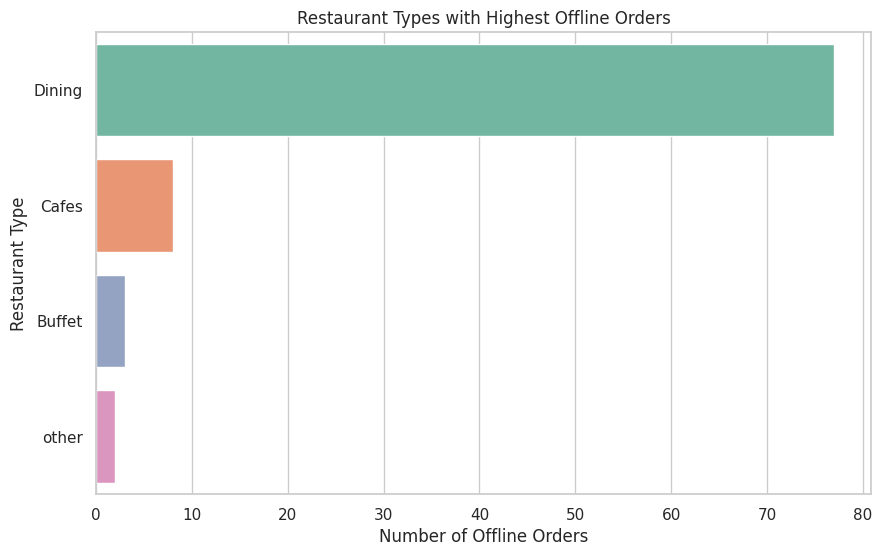

In [ ]:
# Pivot table for restaurant types vs online order count
offline_orders = zomato_df[zomato_df['online_order'] == 'No']
offline_type_counts = offline_orders['listed_in(type)'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=offline_type_counts.values, y=offline_type_counts.index, palette='Set2')
plt.title('Restaurant Types with Highest Offline Orders')
plt.xlabel('Number of Offline Orders')
plt.ylabel('Restaurant Type')
plt.show()

**Interpretations:-**

*   Casual Dining type restaurants are the most preferred for offline orders.

*   Zomato can promote offline offers for these types of restaurants to boost in-house dining engagement.

# **Step-5: Conclusion**

**Final Summary: Zomato Data Insights Report**



1. **Most Common Type of Restaurant**

   *   Casual Dining is the most common restaurant type.
   *   These restaurants form the backbone of Zomato’s platform in terms of availability.



2. **Votes by Restaurant Type**

   *   Cafes and Casual Dining receive the highest number of customer votes.
   *   Indicates strong customer engagement and popularity.



3. **Ratings Distribution**

   *   Majority of restaurants have ratings in the 3.5 to 4.5 range.
   *   Reflects generally good quality food and service across the platform.



4. **Cost Preferences for Couples**

   *   Average cost for two people is approximately ₹ 418.24.
   *   Helps Zomato design couple-friendly combos or meal plans within this budget.



5. **Online vs Offline Orders (Rating-wise)**

   *   Online orders have received slightly higher average ratings than offline.
   *   Indicates better user satisfaction with online ordering experience.



6. **Online Order Preference by Restaurant Type**

   *   Cafes and Quick Bites show high online order volumes.
   *   Customers prefer quick service restaurants for delivery.
   *   Casual Dining sees higher offline engagement.



7. **Highest Offline Orders by Type**

   *   Casual Dining leads in offline orders.
   *   Zomato can consider promoting exclusive in-restaurant offers for such places.

**Customer Persona Based on Findings**



***“Zomato's Typical User”:-***

   1.   Prefers Casual Dining or Quick Bites.
   2.   Mostly places online orders for cafes and fast food.
   3.   Leaves ratings between 3.5 and 4.5.
   4.   Spends around ₹ 418.24 per couple.
   5.   Enjoys ordering frequently from highly voted and well-rated restaurants.
   6.   When dining out, often chooses Casual Dining options and appreciates offers.